In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import operator
import random
import datetime

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from datetime import datetime
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [2]:
datatrain = pd.read_csv("train.csv")
datatest = pd.read_csv("test.csv")


In [3]:
# convertinng the Nan fields to 0
train = datatrain
test = datatest
train.Province_State = train.Province_State.fillna(0)
test.Province_State = test.Province_State.fillna(0)

In [4]:
traincount = int(len(train["Date"]))
testcount = int(len(test["Date"]))

In [5]:
empty = 0
for i in range(0,traincount):
    if(train.Province_State[i] == empty):
        train.Province_State[i] = train.Country_Region[i]

C:\Users\14158\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
for i in range(0,testcount):
    if(test.Province_State[i] == empty):
        test.Province_State[i] = test.Country_Region[i]

C:\Users\14158\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,Afghanistan,2020-01-26,0.0,0.0


In [8]:
d = train["Date"]

In [9]:
# The format of the date
d[0]

'2020-01-22'

In [10]:
# test.csv
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,Afghanistan,Afghanistan,2020-04-02
1,2,Afghanistan,Afghanistan,2020-04-03
2,3,Afghanistan,Afghanistan,2020-04-04
3,4,Afghanistan,Afghanistan,2020-04-05
4,5,Afghanistan,Afghanistan,2020-04-06


In [11]:
## converting the Date column to datetime format

date = pd.to_datetime(train["Date"])
datet = pd.to_datetime(test["Date"])
print (date)

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
31921   2020-04-28
31922   2020-04-29
31923   2020-04-30
31924   2020-05-01
31925   2020-05-02
Name: Date, Length: 31926, dtype: datetime64[ns]


In [12]:
ldate = int(len(date))
ldatet = int(len(datet))

In [13]:
m = []
d = []
for i in range(0,ldate):
    dx = (date[i].strftime("%d"))
    mx = (date[i].strftime("%m"))
    m.append(int(mx))
    d.append(int(dx))

mt = []
dt = []
for i in range(0,ldatet):
    dtx = (datet[i].strftime("%d"))
    mtx = (datet[i].strftime("%m"))
    mt.append(int(mtx))
    dt.append(int(dtx))

In [14]:
train.insert(6,"Month",m,False)
train.insert(7,"Day",d,False)
test.insert(4,"Month",mt,False)
test.insert(5,"Day",dt,False)

In [15]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,Day
0,1,Afghanistan,Afghanistan,2020-01-22,0.0,0.0,1,22
1,2,Afghanistan,Afghanistan,2020-01-23,0.0,0.0,1,23
2,3,Afghanistan,Afghanistan,2020-01-24,0.0,0.0,1,24
3,4,Afghanistan,Afghanistan,2020-01-25,0.0,0.0,1,25
4,5,Afghanistan,Afghanistan,2020-01-26,0.0,0.0,1,26


In [16]:
print("Data_train")
traindays = datatrain['Date'].nunique()
print("Number of Country_Region: ", datatrain['Country_Region'].nunique())
print("Number of Province_State: ", datatrain['Province_State'].nunique())
print("Number of Days: ", traindays)

notrain = datatrain['Id'].nunique()
print("Number of datapoints in train:", notrain)
lotrain = int(notrain/traindays)
print("L Trains:", lotrain)

Data_train
Number of Country_Region:  184
Number of Province_State:  312
Number of Days:  102
Number of datapoints in train: 31926
L Trains: 313


In [17]:
print("Data_test")
testdays = datatest['Date'].nunique()
print("Number of Days: ", testdays)
notest = datatest['ForecastId'].nunique()
print("Number of datapoints in test:", notest)
lotest = int(notest/testdays)
print("L Test:", lotest)

Data_test
Number of Days:  43
Number of datapoints in test: 13459
L Test: 313


In [18]:
daycount = []
for i in range(0,lotrain):
    for j in range(1,traindays+1):
        daycount.append(j)

In [19]:
train.insert(8,"DayCount", daycount, False)

In [20]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,Day,DayCount
0,1,Afghanistan,Afghanistan,2020-01-22,0.0,0.0,1,22,1
1,2,Afghanistan,Afghanistan,2020-01-23,0.0,0.0,1,23,2
2,3,Afghanistan,Afghanistan,2020-01-24,0.0,0.0,1,24,3
3,4,Afghanistan,Afghanistan,2020-01-25,0.0,0.0,1,25,4
4,5,Afghanistan,Afghanistan,2020-01-26,0.0,0.0,1,26,5


In [21]:
test.head()

,ForecastId,Province_State,Country_Region,Date,Month,Day
0,1,Afghanistan,Afghanistan,2020-04-02,4,2
1,2,Afghanistan,Afghanistan,2020-04-03,4,3
2,3,Afghanistan,Afghanistan,2020-04-04,4,4
3,4,Afghanistan,Afghanistan,2020-04-05,4,5
4,5,Afghanistan,Afghanistan,2020-04-06,4,6


In [22]:

zt = datet[0]

for i in range(traindays):
    if(zt == date[i]):
        zx = i
        print(zx)
        
daytest = []
for i in range(0,lotest):
    for j in range(1,testdays+1):
        jr = zx + j
        daytest.append(jr)

71


In [23]:
test.insert(6,"DayCount",daytest,False)

In [24]:
test.head()

,ForecastId,Province_State,Country_Region,Date,Month,Day,DayCount
0,1,Afghanistan,Afghanistan,2020-04-02,4,2,72
1,2,Afghanistan,Afghanistan,2020-04-03,4,3,73
2,3,Afghanistan,Afghanistan,2020-04-04,4,4,74
3,4,Afghanistan,Afghanistan,2020-04-05,4,5,75
4,5,Afghanistan,Afghanistan,2020-04-06,4,6,76


In [25]:
china_train = train.loc[train['Country_Region'] == 'China']
US_train = train.loc[train['Country_Region'] == 'US']
italy_train = train.loc[train['Country_Region'] == 'Italy']

china_test = test.loc[test['Country_Region'] == 'China']
US_test = test.loc[test['Country_Region'] == 'US']
italy_test = test.loc[test['Country_Region'] == 'Italy']

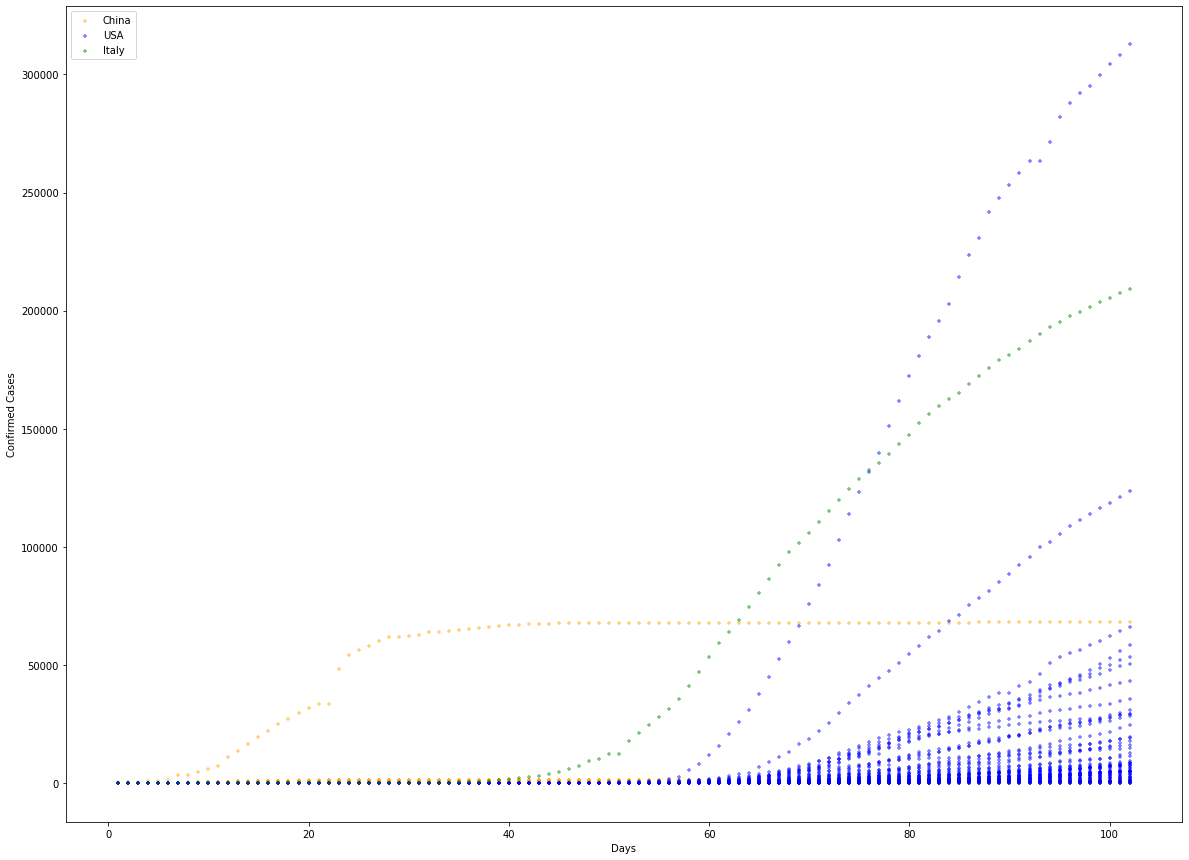

In [26]:
fig = plt.figure(figsize=(20,15))
chi = plt.scatter(china_train.DayCount, china_train.ConfirmedCases,  s=10, c='orange', marker = '+', alpha = 0.5)
usa = plt.scatter(US_train.DayCount,US_train.ConfirmedCases,  s=10, c='blue', marker = '+', alpha = 0.5)
ita = plt.scatter(italy_train.DayCount,italy_train.ConfirmedCases,  s=10, c='green', marker = '+', alpha = 0.5)
plt.xlabel("Days")
plt.ylabel("Confirmed Cases")
plt.legend((chi, usa, ita  ),('China', 'USA', 'Italy'))

In [27]:
## converting Province State and Country Region to integer values

label = preprocessing.LabelEncoder()
china_train.Country_Region = label.fit_transform(china_train.Country_Region)
china_train.Province_State = label.fit_transform(china_train.Province_State)

C:\Users\14158\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
#test.Country_Region = label.fit_transform(test.Country_Region)
#test.Province_State = label.fit_transform(test.Province_State)

In [29]:
US_train.Country_Region = label.fit_transform(US_train.Country_Region)
US_train.Province_State = label.fit_transform(US_train.Province_State)

In [30]:
italy_train.Country_Region = label.fit_transform(italy_train.Country_Region)
italy_train.Province_State = label.fit_transform(italy_train.Province_State)

In [60]:
US_test.Country_Region = label.fit_transform(US_test.Country_Region)
US_test.Province_State = label.fit_transform(US_test.Province_State)
china_test.Country_Region = label.fit_transform(china_test.Country_Region)
china_test.Province_State = label.fit_transform(china_test.Province_State)
italy_test.Country_Region = label.fit_transform(italy_test.Country_Region)
italy_test.Province_State = label.fit_transform(italy_test.Province_State)

C:\Users\14158\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
china_train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,Day,DayCount
5508,6157,0,0,2020-01-22,1.0,0.0,1,22,1
5509,6158,0,0,2020-01-23,9.0,0.0,1,23,2
5510,6159,0,0,2020-01-24,15.0,0.0,1,24,3
5511,6160,0,0,2020-01-25,39.0,0.0,1,25,4
5512,6161,0,0,2020-01-26,60.0,0.0,1,26,5


In [62]:
US_train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,Day,DayCount
24174,27019,0,0,2020-01-22,0.0,0.0,1,22,1
24175,27020,0,0,2020-01-23,0.0,0.0,1,23,2
24176,27021,0,0,2020-01-24,0.0,0.0,1,24,3
24177,27022,0,0,2020-01-25,0.0,0.0,1,25,4
24178,27023,0,0,2020-01-26,0.0,0.0,1,26,5


In [63]:
italy_train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,Day,DayCount
14892,16645,0,0,2020-01-22,0.0,0.0,1,22,1
14893,16646,0,0,2020-01-23,0.0,0.0,1,23,2
14894,16647,0,0,2020-01-24,0.0,0.0,1,24,3
14895,16648,0,0,2020-01-25,0.0,0.0,1,25,4
14896,16649,0,0,2020-01-26,0.0,0.0,1,26,5


In [64]:
linear_reg_china = LinearRegression()
linear_reg_US = LinearRegression()
linear_reg_italy = LinearRegression()

In [112]:
x_china = np.c_[china_train["Province_State"], china_train["Country_Region"], china_train["DayCount"]]
xt_china = np.c_[china_test["Province_State"], china_test["Country_Region"], china_test["DayCount"]] #  have to add days to test as well
y_china = china_train["ConfirmedCases"]

In [66]:
x_US = np.c_[US_train["Province_State"], US_train["Country_Region"], US_train["DayCount"]]
xt_US = np.c_[US_test["Province_State"], US_test["Country_Region"],US_test["DayCount"]]
y_US = US_train["ConfirmedCases"]

In [67]:
x_italy = np.c_[italy_train["Province_State"], italy_train["Country_Region"], italy_train["DayCount"]]
xt_italy = np.c_[italy_test["Province_State"], italy_test["Country_Region"],italy_test["DayCount"]]
y_italy = italy_train["ConfirmedCases"]

In [68]:
linear_reg_china.fit(x_china,y_china)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
linear_reg_US.fit(x_US,y_US)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
linear_reg_italy.fit(x_italy,y_italy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
ypred_china = linear_reg_china.predict(x_china)

In [72]:
ypred_US = linear_reg_US.predict(x_US)

In [73]:
ypred_italy = linear_reg_italy.predict(x_italy)

In [74]:
print(ypred_china)

[1958.92548592 1980.44120768 2001.95692944 ... 2071.04128803 2092.55700979
 2114.07273155]


In [75]:
print(ypred_US)

[-5108.87559483 -4929.27616975 -4749.67674466 ... 13040.0456626
 13219.64508769 13399.24451277]


In [76]:
print(ypred_italy)

[-55159.67751761 -52794.57246873 -50429.46741984 -48064.36237096
 -45699.25732208 -43334.15227319 -40969.04722431 -38603.94217543
 -36238.83712655 -33873.73207766 -31508.62702878 -29143.5219799
 -26778.41693101 -24413.31188213 -22048.20683325 -19683.10178436
 -17317.99673548 -14952.8916866  -12587.78663772 -10222.68158883
  -7857.57653995  -5492.47149107  -3127.36644218   -762.2613933
   1602.84365558   3967.94870446   6333.05375335   8698.15880223
  11063.26385111  13428.3689      15793.47394888  18158.57899776
  20523.68404665  22888.78909553  25253.89414441  27618.99919329
  29984.10424218  32349.20929106  34714.31433994  37079.41938883
  39444.52443771  41809.62948659  44174.73453548  46539.83958436
  48904.94463324  51270.04968212  53635.15473101  56000.25977989
  58365.36482877  60730.46987766  63095.57492654  65460.67997542
  67825.7850243   70190.89007319  72555.99512207  74921.10017095
  77286.20521984  79651.31026872  82016.4153176   84381.52036649
  86746.62541537  89111.730

In [77]:
y_china

5508       1.0
5509       9.0
5510      15.0
5511      39.0
5512      60.0
         ...  
8869    1268.0
8870    1268.0
8871    1268.0
8872    1268.0
8873    1268.0
Name: ConfirmedCases, Length: 3366, dtype: float64

In [78]:
y_US

24174      0.0
24175      0.0
24176      0.0
24177      0.0
24178      0.0
         ...  
29677    536.0
29678    545.0
29679    559.0
29680    566.0
29681    579.0
Name: ConfirmedCases, Length: 5508, dtype: float64

In [79]:
y_italy

14892         0.0
14893         0.0
14894         0.0
14895         0.0
14896         0.0
           ...   
14989    201505.0
14990    203591.0
14991    205463.0
14992    207428.0
14993    209328.0
Name: ConfirmedCases, Length: 102, dtype: float64

In [80]:
ascore_china = mean_squared_error(ypred_china,y_china)
print("Training China - Mean Squared Error is: ",ascore_china)

Training China - Mean Squared Error is:  102827813.1979157


In [81]:
ascore_US = mean_squared_error(ypred_US,y_US)
print("Training US - Mean Squared Error is: ",ascore_US)

Training US - Mean Squared Error is:  347207976.58819807


In [82]:
ascore_italy = mean_squared_error(ypred_italy,y_italy)
print("Training Italy - Mean Squared Error is: ",ascore_italy)

Training Italy - Mean Squared Error is:  866294788.9220006


In [83]:
xgbr_china = XGBRegressor(n_estimators = 2150 , gamma = 0, learning_rate = 0.04,  random_state = 42 , max_depth = 23)

In [84]:
xgbr_US = XGBRegressor(n_estimators = 2150 , gamma = 0, learning_rate = 0.04,  random_state = 42 , max_depth = 23)

In [85]:
xgbr_italy = XGBRegressor(n_estimators = 2150 , gamma = 0, learning_rate = 0.04,  random_state = 42 , max_depth = 23)

In [86]:
xgbr_china.fit(x_china,y_china)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.04, max_delta_step=0, max_depth=23,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=2150, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [87]:
xgbr_US.fit(x_US,y_US)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.04, max_delta_step=0, max_depth=23,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=2150, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [88]:
xgbr_italy.fit(x_italy,y_italy)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.04, max_delta_step=0, max_depth=23,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=2150, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [140]:
ypred_xgbr_china_1 = xgbr_china.predict(x_china)

In [141]:
ypred_xgbr_US_1 = xgbr_US.predict(x_US)

In [142]:
ypred_xgbr_italy_1 = xgbr_italy.predict(x_italy)

In [143]:
ypred_xgbr_china = xgbr_china.predict(xt_china)
newc = np.round(ypred_xgbr_china.astype(int))

In [144]:
ypred_xgbr_US = xgbr_US.predict(xt_US)
newUS = np.round(ypred_xgbr_US.astype(int))

In [145]:
ypred_xgbr_italy = xgbr_italy.predict(xt_italy)
newitaly = np.round(ypred_xgbr_italy.astype(int))

In [146]:
ascore_xgbr_china = mean_squared_error(ypred_xgbr_china_1,y_china)
print("Training China- Mean Squared Error is: ",ascore_xgbr_china)

Training China- Mean Squared Error is:  0.00034187587282995984


In [147]:
ascore_xgbr_US = mean_squared_error(ypred_xgbr_US_1,y_US)
print("Training US- Mean Squared Error is: ",ascore_xgbr_US)

Training US- Mean Squared Error is:  0.001227519752523926


In [148]:
ascore_xgbr_italy = mean_squared_error(ypred_xgbr_italy_1,y_italy)
print("Training Italy- Mean Squared Error is: ",ascore_xgbr_italy)

Training Italy- Mean Squared Error is:  0.018207963010816182


In [149]:
dchina = china_test["DayCount"]
yp_china = pd.DataFrame()
yp_china.insert(0,"DayCount",dchina,False)
yp_china.insert(1,"ConfirmedCases",newc,False)

Text(0, 0.5, 'Confirmed Cases')

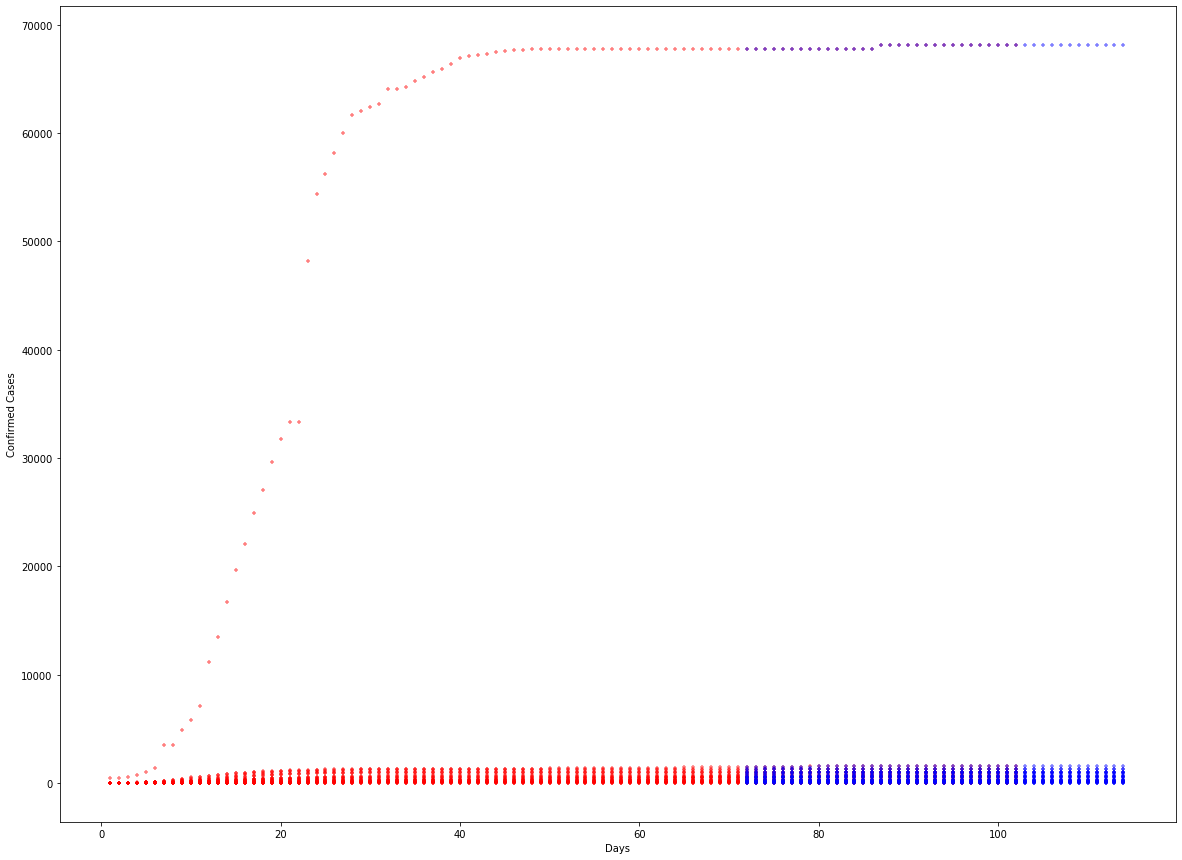

In [126]:
fig_china = plt.figure(figsize=(20,15))
chi = plt.scatter(china_train.DayCount, china_train.ConfirmedCases,  s=10, c='red', marker = '+', alpha = 0.5)
chi2 = plt.scatter(dchina, newc, s=10, c='blue', marker = '+', alpha = 0.5)
plt.xlabel("Days")
plt.ylabel("Confirmed Cases")

In [127]:
dUS = US_test["DayCount"]
yp_US = pd.DataFrame()
yp_US.insert(0,"DayCount",dUS,False)
yp_US.insert(1,"ConfirmedCases",newUS,False)

Text(0, 0.5, 'Confirmed Cases')

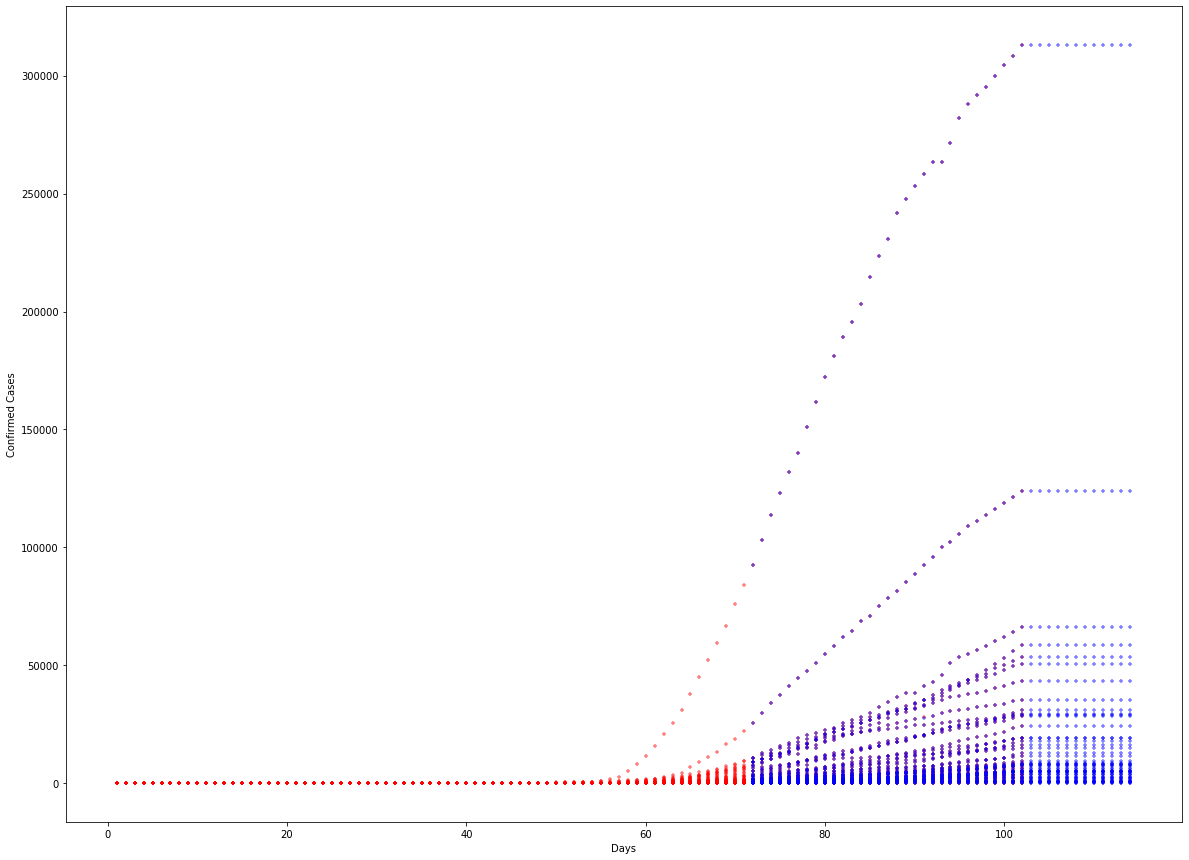

In [128]:
fig_US = plt.figure(figsize=(20,15))
US = plt.scatter(US_train.DayCount, US_train.ConfirmedCases,  s=10, c='red', marker = '+', alpha = 0.5)
US2 = plt.scatter(dUS, newUS, s=10, c='blue', marker = '+', alpha = 0.5)
plt.xlabel("Days")
plt.ylabel("Confirmed Cases")

In [132]:
ditaly = italy_test["DayCount"]
yp_italy = pd.DataFrame()
yp_italy.insert(0,"DayCount",ditaly,False)
yp_italy.insert(1,"ConfirmedCases",newitaly,False)

Text(0, 0.5, 'Confirmed Cases')

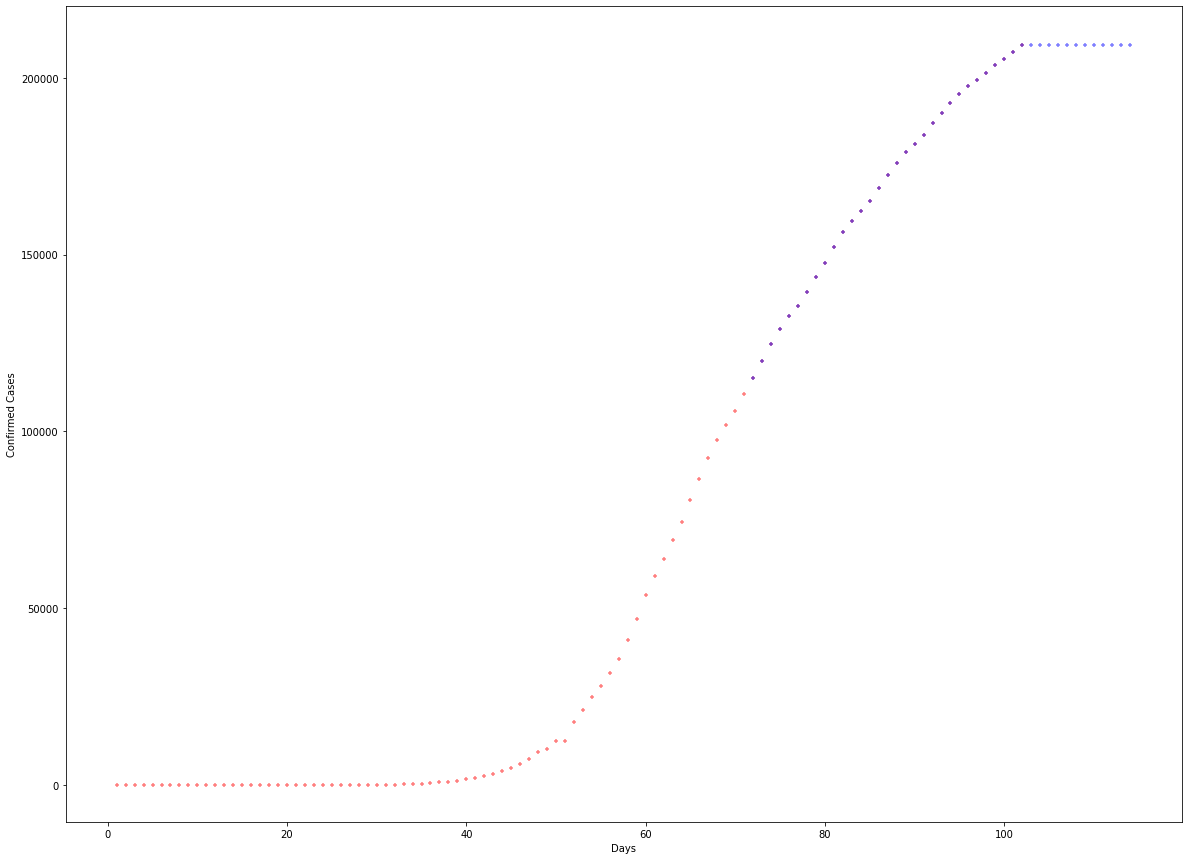

In [133]:
fig_italy = plt.figure(figsize=(20,15))
italy = plt.scatter(italy_train.DayCount, italy_train.ConfirmedCases,  s=10, c='red', marker = '+', alpha = 0.5)
italy2 = plt.scatter(ditaly, newitaly, s=10, c='blue', marker = '+', alpha = 0.5)
plt.xlabel("Days")
plt.ylabel("Confirmed Cases")